> <div>
<img src="https://logos-world.net/wp-content/uploads/2020/11/Shopify-Logo.png", 
     alt="Making commerce better for everyone", width="300"align="left"/>
</div>

> # **Company Name:** Shopify 
> **Project:**     Winter 2022 Data Science Intern Challenge<br>
> **Applicant:**    Muftawo Omar<br>
> **Email:**    muftawoomar@gmail.com <br> **LinkedIn:** [Muftawo](https://www.linkedin.com/in/muftawo-omar-b34701132/)<br>
> **Github:**   [Muftawo](https://github.com/Muftawo/)<br>



> ## Table of Contents

> * [Introduction](#In)
> * [Challenge 1](#ch1)
    * [Answers](#ans)
    * [Solution](#sl1)   
> * [Challenge 2](#ch2)
    * [Question A](#qa)
    * [Question B](#qb)
    * [Question C](#qc)
  

<div id="In"></div>

> ## Introduction

> As a requirement for  the [Winter 2022 Data Science Intern (Remote)](https://www.shopify.com/careers/data-science-intern-remote-winter-2022-4475e105) application. I solve the [challenge questions](https://docs.google.com/document/d/13VCtoyto9X1PZ74nPI4ZEDdb8hF8LAlcmLH1ZTHxKxE/edit#heading=h.5j27tl9uwcuc) below. In this notebook I employ my data sceince skills to explain each challenge and explore data to return  the right answer


<div id="ch1"></div>

# Challenge 1

<div id="ans"></div>

### Anwsers
> **Questions A** <br>
A better way to find the average order value is to obtain the order amount per a shoe and find the median selling amount at each store.

> **Questions B** <br>
The metric I will report is the median amount per shoe

> **Questions C** <br>
The median price per shoe is $153.0




<div id="sl1"></div>

### Solution
> **Obeject**<br>
What is the better average order value (AVO) metric to report for 100 sneaker shops?  

> To identify what the appropirate metric to report is, we need to understand our data and know why our naively calculated AOV is $3145.13. 
What is contributing to this figure?


> **KEY ASSUMPTIONS ABOUT DATA**
> 1. Data represents orders within a 30 day window
> 2. We have exactly 100 sneaker shops
> 3. Each shop sells only one model of shoe


In [48]:
#import libaries for data exploration 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
# load data
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

**Data Quality Assesment**<br>
In this process I check if there are any missing values or duplicated entiries. And luckily there is none

In [26]:
# check for duplications 
df.duplicated().sum()

0

In [27]:
# missing values 
df.isnull().values.any()

False

In [3]:
#data sample
df.head(n=2)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52


**Some Basic Data Exploration** <br>
> Lets have a look at the general description of our dataset.Here, I seek to  confirm if the AOV is indeed the reported amount. 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
shop_id,5000.0,50.0788,29.006118,1.0,24.00,50.0,75.00,100.0
user_id,5000.0,849.0924,87.798982,607.0,775.00,849.0,925.00,999.0
order_amount,5000.0,3145.1280,41282.539349,90.0,163.00,284.0,390.00,704000.0
total_items,5000.0,8.7872,116.320320,1.0,1.00,2.0,3.00,2000.0


In [5]:
df.order_amount.mean()

3145.128

In [51]:
df['shop_id'].nunique()

100

>Indeed our mean order amount is $3145.13. I continue to  explore the data to understand the reason with the aid of  some visualizations. We also observe a median amount of 284.0. I also confirm that there are indeed a 100 different shops

> **Data Exploration**

> Below I take another look at the the columns in dataset to understand what they each mean. Below is an explantion of each field means.

> **order_id :**  An ID filed that distinguish each ORDER form another. <br>
> **shop_id :**   An ID filed that distinguish each SHOP form another. <br>
> **user_id :**   An ID filed that distinguish each USER form another.<br>
> **order_amount :**   The exact amount USER paid for an order<br>
> **total_items :**   The total quantity of SHOES customer bought in one order<br>
> **payment_method :**   The method of payment customer used for that order  <br>
> **created_at :**   The exact time and day the order tookplace <br>



In [6]:
df.head(2)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52


> I observed the **order_amount** field represents the total amount paid for all the items in a particular order therefore I calculate the amount per shoe for each order 

In [7]:
df["amount_per_shoe"]= df.order_amount/df.total_items

In [8]:
df.head(2)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amount_per_shoe
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0


**Data Visualization**
> Now with the additional field I explore the data with the aid of visualizations.


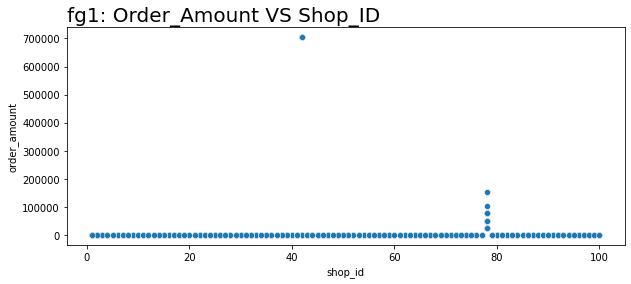

In [62]:
plt.figure(figsize=( 10,4))
plt.title("fg1: Order_Amount VS Shop_ID",fontsize=20,loc="left")
g=sns.scatterplot(data=df,x= "shop_id" ,y= "order_amount")
plt.show()

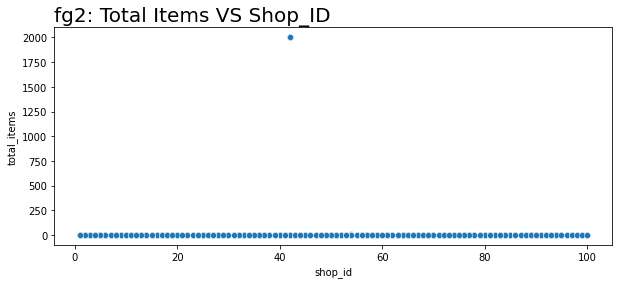

In [46]:
plt.figure(figsize=( 10,4))
plt.title("fg2: Total Items VS Shop_ID",fontsize=20,loc="left")
sns.scatterplot(data=df,x= "shop_id" ,y= "total_items")
plt.show()

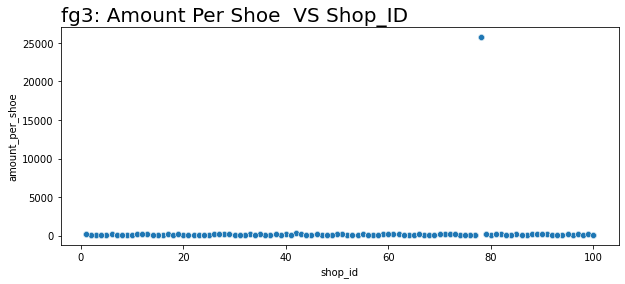

In [52]:
plt.figure(figsize=( 10,4))
plt.title("fg3: Amount Per Shoe  VS Shop_ID",fontsize=20,loc="left")
sns.scatterplot(data=df,x= "shop_id" ,y= "amount_per_shoe")
plt.show()

>From **fg1** we observe that while most shops have almost the same order amount some shops have some shops observed extreme figures. <br>
>From **fg2** we observe that while most shops have almost the same order amount some shops have some extreme figures. <br>
>From **fg3** we observe that while most shops have almost the same order amount some shops have some extreme figures. <br>


In [28]:
df.amount_per_shoe.median()

153.0

### Conclusion 

There are no missing values
There are no duplicates
There are 2 outliers: user id 607 and shop id 78 : These 2 are the main reasons of fraud
Net mean of the cleaned (with no outliers) data is  302.58 $
Here median (284) could also be used but after removing outliers, mean is a better representative of the spread

<div id="ch2"></div>

## Challenge 2 

  


<div id="qa"></div>

**Question A**<br>
How many orders were shipped by Speedy Express in total?<br>

                 
**Answer :** A total of 54 orders were shipped by Speedy Express<br>

**Querry** <br>
SELECT count(*) AS NumOrders FROM Orders<br>
where ShipperID in (SELECT ShipperID FROM Shippers<br>
					where ShipperName= 'Speedy Express' )<br>



<div id="qb"></div>

**Question B**<br>

What is the last name of the employee with the most orders?<br>

**Answer :** The last name of the Employee with most Orders is Peacock <br>

**Querry** <br>
SELECT LastName FROM Employees as e <br>
JOIN (SELECT * , count(EmployeeID) AS TotalOrders FROM Orders <br>
GROUP BY EmployeeID <br>
ORDER BY TotalOrders DESC <br>
LIMIT 1) as j <br>
ON e.EmployeeID = j.EmployeeID <br>


<div id="qc"></div>

**Question C**<br>
What product was ordered the most by customers in Germany? <br>

**Answer :** Boston Crab Meat was the product most customers in Germany ordered.It was ordered 256 times <br>

**Querry** <br>
SELECT ProductName FROM (SELECT *, SUM(od.Quantity) AS TotalOrders FROM OrderDetails od  <br>
JOIN Orders o <br>
ON od.OrderID = o.OrderID <br>
JOIN Customers c
ON c.CustomerID = o.CustomerID <br>
JOIN Products p
ON p.ProductID = od.ProductID <br>
GROUP BY od.ProductID
HAVING c.Country = "Germany" <br>
ORDER BY TotalOrders DESC 
LIMIT 1) <br>



